# CIA Country Analysis and Clustering


Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

(Alternative Source: https://www.openintro.org/data/index.php?data=cia_factbook)
## Goal: 

### Gain insights into similarity between countries and regions of the world by experimenting with K-Means Clustering
----

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Perform Exploratory Data Analysis

In [35]:
df = pd.read_csv("../Datasets/fact-book/cia_factbook.csv")
df.head()


country        area  birth_rate  death_rate  infant_mortality_rate  \
0         Russia  17098242.0       11.87       13.83                   7.08   
1         Canada   9984670.0       10.29        8.31                   4.71   
2  United States   9826675.0       13.42        8.15                   6.17   
3          China   9596960.0       12.17        7.44                  14.79   
4         Brazil   8514877.0       14.72        6.54                  19.21   

   internet_users  life_exp_at_birth  maternal_mortality_rate  \
0      40853000.0              70.16                     34.0   
1      26960000.0              81.67                     12.0   
2     245000000.0              79.56                     21.0   
3     389000000.0              75.15                     37.0   
4      75982000.0              73.28                     56.0   

   net_migration_rate    population  population_growth_rate  
0                1.69  1.424703e+08                   -0.03  
1                5.66  3.483484e+07                    0.76  
2                2.45  3.188921e+08                    0.77  
3               -0.32  1.355693e+09                    0.44  
4               -0.15  2.026568e+08                    0.80

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  259 non-null    object 
 1   area                     257 non-null    float64
 2   birth_rate               224 non-null    float64
 3   death_rate               225 non-null    float64
 4   infant_mortality_rate    224 non-null    float64
 5   internet_users           213 non-null    float64
 6   life_exp_at_birth        224 non-null    float64
 7   maternal_mortality_rate  184 non-null    float64
 8   net_migration_rate       222 non-null    float64
 9   population               238 non-null    float64
 10  population_growth_rate   233 non-null    float64
dtypes: float64(10), object(1)
memory usage: 22.4+ KB



Correlation heatmap of numerical variables:


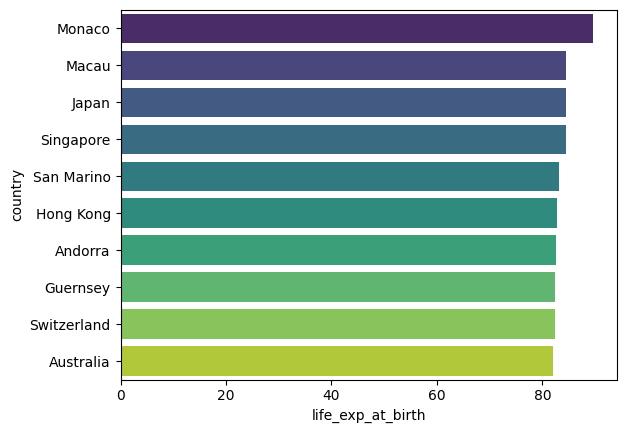

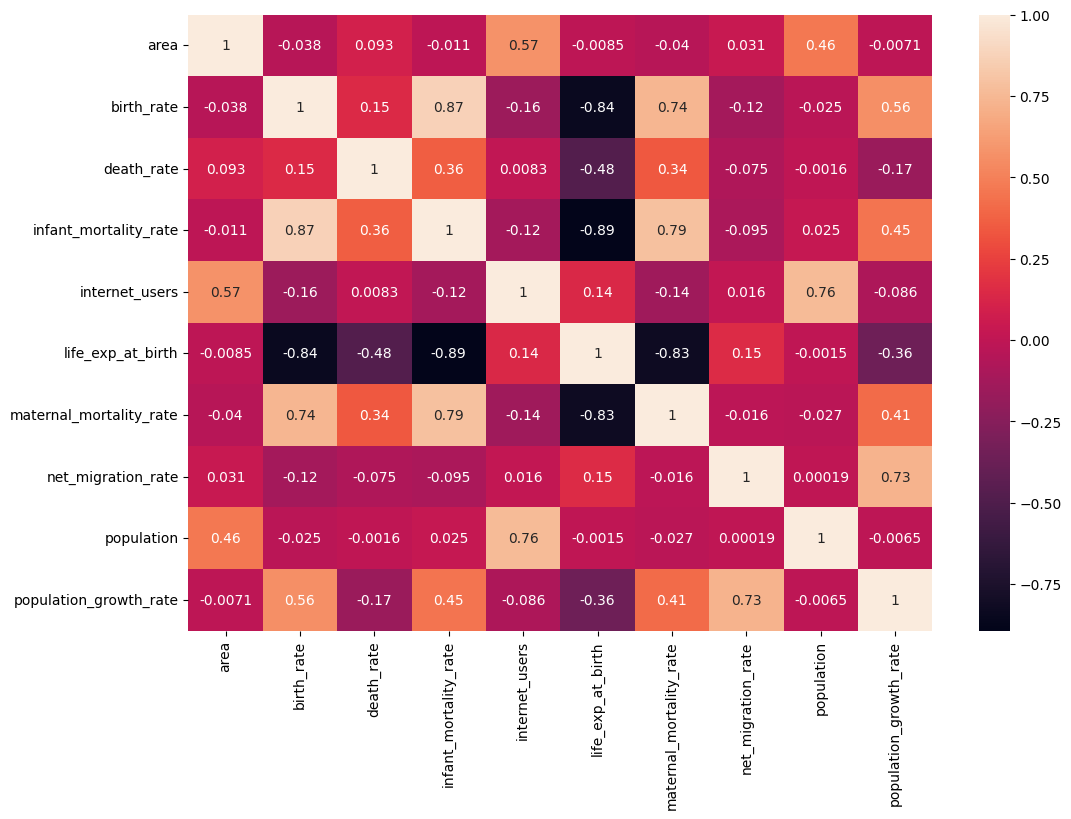

In [40]:
df_sorted = df.sort_values(by='life_exp_at_birth', ascending=False)

# Choose the top N countries to display
top_n = 10  # Adjust this number as needed
top_countries = df_sorted.head(top_n)

sns.barplot(data=top_countries, x='life_exp_at_birth', y='country', palette='viridis', hue='country', dodge=False, legend=False)


# Select only numerical columns
numerical_columns = df.select_dtypes(include=np.number)

# Correlation heatmap of numerical variables
print("\nCorrelation heatmap of numerical variables:")
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_columns.corr(), annot=True)
plt.show()


-----

<Axes: xlabel='internet_users', ylabel='country'>

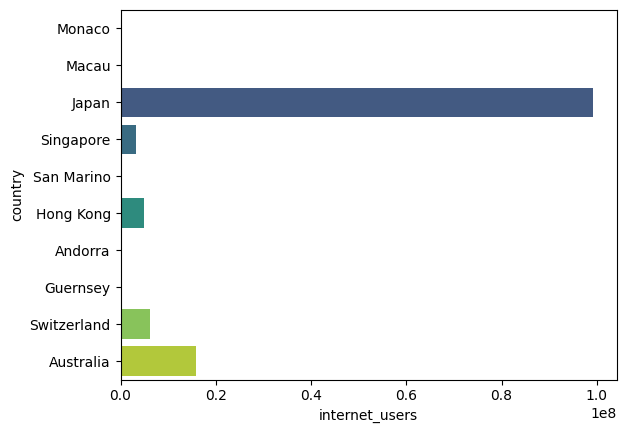

In [32]:
df_sorted = df.sort_values(by='internet_users', ascending=False)
sns.barplot(data=top_countries, x='internet_users', y='country', palette='viridis', hue='country', dodge=False, legend=False)

## 2. Feature Engineering for Missing Data

**TASK: What countries have NaN for Agriculture? What is the main aspect of these countries?**

(In lieu of agriculture, I'll be using maternal_mortality_rate)



In [42]:
column_name = 'maternal_mortality_rate'  # Replace 'internet_users' with the column name you're interested in

countries_with_nan = df[df[column_name].isna()]

print("Countries with NaN values for column '{}':".format(column_name))

countries_with_nan.head()

Countries with NaN values for column 'maternal_mortality_rate':


country       area  birth_rate  death_rate  infant_mortality_rate  \
11        Greenland  2166086.0       14.53        8.38                   9.42   
77   Western Sahara   266000.0       30.71        8.49                  56.09   
124        Svalbard    62045.0         NaN         NaN                    NaN   
137          Taiwan    35980.0        8.55        6.97                   4.49   
154   New Caledonia    18575.0       15.57        5.45                   5.46   

     internet_users  life_exp_at_birth  maternal_mortality_rate  \
11          36000.0              71.82                      NaN   
77              NaN              62.27                      NaN   
124             NaN                NaN                      NaN   
137      16147000.0              79.84                      NaN   
154         85000.0              77.31                      NaN   

     net_migration_rate  population  population_growth_rate  
11                -5.98     57728.0                    0.02  
77                  NaN    554795.0                    2.89  
124                 NaN      1872.0                   -0.03  
137                0.90  23359928.0                    0.25  
154                4.06    267840.0                    1.42

**TASK: Notice climate is missing for a few countries, but not the Region! Let's use this to our advantage. Fill in the missing Climate values based on the mean climate value for its region.**

Hints on how to do this: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group



In [45]:
# Climate = life expectancy
# Region = death_rate
df['life_exp_at_birth'] = df['life_exp_at_birth'].fillna(df.groupby('death_rate')['life_exp_at_birth'].transform('mean'))
df.head()

country        area  birth_rate  death_rate  infant_mortality_rate  \
0         Russia  17098242.0       11.87       13.83                   7.08   
1         Canada   9984670.0       10.29        8.31                   4.71   
2  United States   9826675.0       13.42        8.15                   6.17   
3          China   9596960.0       12.17        7.44                  14.79   
4         Brazil   8514877.0       14.72        6.54                  19.21   

   internet_users  life_exp_at_birth  maternal_mortality_rate  \
0      40853000.0              70.16                     34.0   
1      26960000.0              81.67                     12.0   
2     245000000.0              79.56                     21.0   
3     389000000.0              75.15                     37.0   
4      75982000.0              73.28                     56.0   

   net_migration_rate    population  population_growth_rate  
0                1.69  1.424703e+08                   -0.03  
1                5.66  3.483484e+07                    0.76  
2                2.45  3.188921e+08                    0.77  
3               -0.32  1.355693e+09                    0.44  
4               -0.15  2.026568e+08                    0.80

**TASK:Use the same method for the missing values in Literacy.**

In [46]:
# Climate = population
# Region = population_growth_rate
df['population'] = df['population'].fillna(df.groupby('population_growth_rate')['population'].transform('mean'))
df.head()

country        area  birth_rate  death_rate  infant_mortality_rate  \
0         Russia  17098242.0       11.87       13.83                   7.08   
1         Canada   9984670.0       10.29        8.31                   4.71   
2  United States   9826675.0       13.42        8.15                   6.17   
3          China   9596960.0       12.17        7.44                  14.79   
4         Brazil   8514877.0       14.72        6.54                  19.21   

   internet_users  life_exp_at_birth  maternal_mortality_rate  \
0      40853000.0              70.16                     34.0   
1      26960000.0              81.67                     12.0   
2     245000000.0              79.56                     21.0   
3     389000000.0              75.15                     37.0   
4      75982000.0              73.28                     56.0   

   net_migration_rate    population  population_growth_rate  
0                1.69  1.424703e+08                   -0.03  
1                5.66  3.483484e+07                    0.76  
2                2.45  3.188921e+08                    0.77  
3               -0.32  1.355693e+09                    0.44  
4               -0.15  2.026568e+08                    0.80

# 3. Data Feature Preparation

**TASK: Create a dummy variable to all categorical data.**

In [48]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Create dummy variables for each categorical column
dummy_df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the dummy DataFrame
dummy_df.head()

area  birth_rate  death_rate  infant_mortality_rate  internet_users  \
0  17098242.0       11.87       13.83                   7.08      40853000.0   
1   9984670.0       10.29        8.31                   4.71      26960000.0   
2   9826675.0       13.42        8.15                   6.17     245000000.0   
3   9596960.0       12.17        7.44                  14.79     389000000.0   
4   8514877.0       14.72        6.54                  19.21      75982000.0   

   life_exp_at_birth  maternal_mortality_rate  net_migration_rate  \
0              70.16                     34.0                1.69   
1              81.67                     12.0                5.66   
2              79.56                     21.0                2.45   
3              75.15                     37.0               -0.32   
4              73.28                     56.0               -0.15   

     population  population_growth_rate  ...  country_Venezuela  \
0  1.424703e+08                   -0.03  ...              False   
1  3.483484e+07                    0.76  ...              False   
2  3.188921e+08                    0.77  ...              False   
3  1.355693e+09                    0.44  ...              False   
4  2.026568e+08                    0.80  ...              False   

   country_Vietnam  country_Virgin Islands  country_Wake Island  \
0            False                   False                False   
1            False                   False                False   
2            False                   False                False   
3            False                   False                False   
4            False                   False                False   

   country_Wallis and Futuna  country_West Bank  country_Western Sahara  \
0                      False              False                   False   
1                      False              False                   False   
2                      False              False                   False   
3                      False              False                   False   
4                      False              False                   False   

   country_Yemen  country_Zambia  country_Zimbabwe  
0          False           False             False  
1          False           False             False  
2          False           False             False  
3          False           False             False  
4          False           False             False  

[5 rows x 268 columns]

**TASK: For numerical data perform standard scaler.**

In [51]:
from sklearn.preprocessing import StandardScaler

numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical data and transform it
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the first few rows of the scaled DataFrame
df.head()

country      area  birth_rate  death_rate  infant_mortality_rate  \
0         Russia  9.782533   -0.807327    1.992068              -0.724460   
1         Canada  5.582179   -0.971092    0.135547              -0.823111   
2  United States  5.488888   -0.646671    0.081735              -0.762338   
3          China  5.353248   -0.776232   -0.157057              -0.403531   
4         Brazil  4.714310   -0.511928   -0.459751              -0.219548   

   internet_users  life_exp_at_birth  maternal_mortality_rate  \
0        0.973458          -0.191433                -0.549947   
1        0.557854           1.122405                -0.633983   
2        7.080433           0.881553                -0.599604   
3       11.388134           0.378163                -0.538488   
4        2.024327           0.164707                -0.465911   

   net_migration_rate  population  population_growth_rate  
0            0.168344    0.864581               -0.798862  
1            0.525437    0.019936               -0.240790  
2            0.236705    2.249012               -0.233725  
3           -0.012451   10.385072               -0.466844  
4            0.002840    1.336881               -0.212533

# 4. Creating and Fitting Kmeans Model

**TASK:** 

- Plot the within sum of squares vs. the number of cluster and find the optimal number of clusters.
- Fit a k-means model of the optimum cluster.

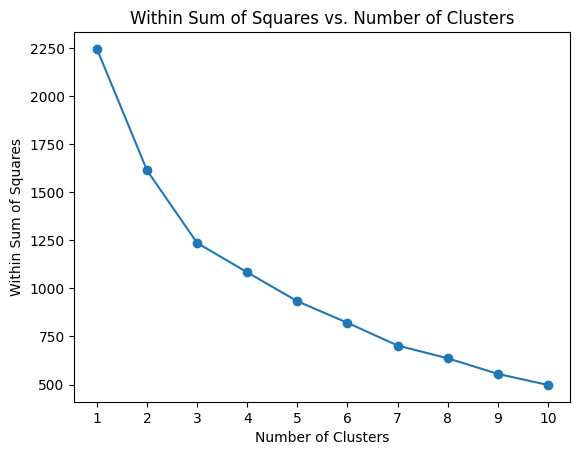

In [56]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

numeric_df = df.select_dtypes(include=['int', 'float'])

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
imputed_numeric_df = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)

# Initialize lists to store inertia values and number of clusters
inertia_values = []
num_clusters = range(1, 11)  # Test cluster numbers from 1 to 10

# Calculate inertia for each number of clusters
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(imputed_numeric_df)
    inertia_values.append(kmeans.inertia_)

# Plot the within sum of squares vs. number of clusters
plt.plot(num_clusters, inertia_values, marker='o')
plt.title('Within Sum of Squares vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Sum of Squares')
plt.xticks(num_clusters)
plt.show()

In [59]:
import numpy as np

# Calculate the first differences of the inertia values
differences = np.diff(inertia_values)

# Calculate the second differences of the inertia values
second_differences = np.diff(differences)

# Find the index of the maximum second difference
optimal_k_index = np.argmax(second_differences) + 1  # Add 1 because of the diff operation

# Get the optimal number of clusters (K)
optimal_k = num_clusters[optimal_k_index]

print("Elbow point (optimal number of clusters):", optimal_k)


Elbow point (optimal number of clusters): 2


-----

# 5. Model Interpretation


**TASK: What K value do you think is a good choice? Are there multiple reasonable choices? What features are helping define these cluster choices.**

To determine a good choice for the number of clusters (K), we typically look for the "elbow point" in the plot of within-cluster sum of squares (inertia) versus the number of clusters. This point represents a trade-off between minimizing inertia and avoiding overfitting. In this case, 2 would be a good value because this is the value computed when finding the difference of inertia values 



---